# Tarea. Redes Neuronales Recurrentes
## Diplomado En Ciencia De Datos_Modulo 6
### Melchor López Ortiz

Utilizar un modelo RNN de predicción para analizar el desarrollo de los precios de acciones de NVIDIA con respecto al tiempo.

Fuente: https://www.kaggle.com/datasets/muhammaddawood42/nvidia-stock-data 

In [2]:
# Importar Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [33]:
# Cargar los datos
data = pd.read_csv("NVIDIA_STOCK.csv")
data = pd.DataFrame(data)

# Cortar columna (precios) y eliminar datos no númericos
NV1 = data = data.drop(labels="Price", axis=1)
NV = NV1.drop(NV1.index[[0,1]])
NV.head()

,Adj Close,Close,High,Low,Open,Volume
2,4.929879665374756,4.983749866485596,4.987500190734863,4.862500190734863,4.894499778747559,355616000
3,5.254334926605225,5.3117499351501465,5.34250020980835,5.09375,5.102499961853027,914704000
4,5.2820329666137695,5.339749813079834,5.451250076293945,5.317249774932861,5.394000053405762,583268000
5,5.326793670654297,5.385000228881836,5.422749996185303,5.2769999504089355,5.354750156402588,580124000
6,5.490012168884277,5.550000190734863,5.625,5.4644999504089355,5.510000228881836,881216000


In [35]:
# Selección de los precios (Precios de cierre)
NV = NV[['Close']]

In [39]:
# Limpieza de datos
imputer = SimpleImputer(strategy='mean')
NV[['Close']] = imputer.fit_transform(NV[['Close']])

In [41]:
timesteps = 60  # Pasos de la predicción


# Crear secuencias de temporales, datos para el entrenamiento
def create_sequences(NV, timesteps):
    X, y = [], []
    for i in range(timesteps, len(NV)):
        X.append(NV[i-timesteps:i, 0])
        y.append(NV[i, 0])
    return np.array(X), np.array(y)

In [43]:
# Escalado de datos
scaler = MinMaxScaler(feature_range=(0, 1))
NV_scaled = scaler.fit_transform(NV.values)

In [45]:
# División de datos en conjuntos de entrenamiento y prueba
train_size = int(len(NV_scaled) * 0.8)
train_data = NV_scaled[:train_size]
test_data = NV_scaled[train_size - timesteps:]

X_train, y_train = create_sequences(train_data, timesteps)
X_test, y_test = create_sequences(test_data, timesteps)

In [47]:
# Reshaping para LSTM input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [49]:
# Modelo 1 (LSTM)
model1 = Sequential([
    LSTM(50, return_sequences=True, input_shape=(timesteps, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model1.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

C:\Users\Melch\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
# Modelo 2 (Agregar más capas, LSTM)
model2 = Sequential([
    LSTM(100, return_sequences=True, input_shape=(timesteps, 1)),
    Dropout(0.2),
    LSTM(100, return_sequences=True),
    Dropout(0.2),
    LSTM(100, return_sequences=False),
    Dropout(0.2),
    Dense(50),
    Dense(1)
])

model2.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

C:\Users\Melch\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [55]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 60, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 60, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 206,701 (807.43 KB)

 Trainable params: 206,701 (807.43 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
epochs = 50
batch_size = 32

# Entrenar el modelo 1
history1 = model1.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                      verbose=1, validation_data=(X_test, y_test))

# Entrenar el modelo 2
history2 = model2.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                      verbose=1, validation_data=(X_test, y_test))

Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0024 - mae: 0.0351 - val_loss: 0.0084 - val_mae: 0.0748
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 1.9149e-04 - mae: 0.0100 - val_loss: 0.0026 - val_mae: 0.0374
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 1.4014e-04 - mae: 0.0081 - val_loss: 0.0038 - val_mae: 0.0449
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 1.3006e-04 - mae: 0.0079 - val_loss: 0.0043 - val_mae: 0.0477
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 1.4194e-04 - mae: 0.0082 - val_loss: 0.0058 - val_mae: 0.0573
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 1.0944e-04 - mae: 0.0074 - val_loss: 0.0050 - val_mae: 0.0532
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 1.1735e-04 - mae: 0.0076 - val_loss: 0.0067 - val_mae: 0.0630
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 1.1585e-04 - mae: 0.0076 - val_loss: 0.0046 - val_mae: 0.0504
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━

In [61]:
#Predicciones del Modelo

y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [63]:
# Revertir Scaling

y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred1_actual = scaler.inverse_transform(y_pred1)
y_pred2_actual = scaler.inverse_transform(y_pred2)

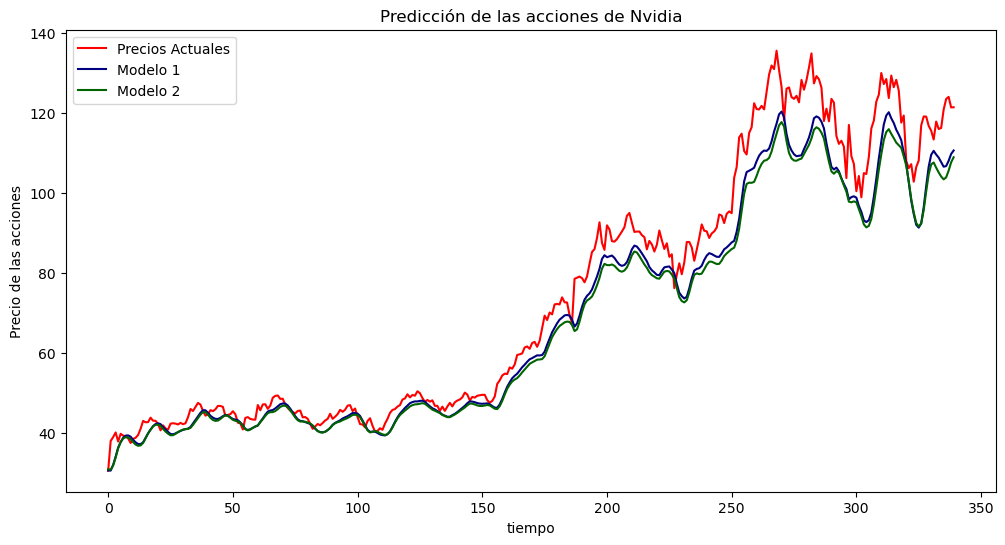

In [81]:
# Conclusiones y visualización del Modelo 
plt.figure(figsize=(12,6))
plt.title("Predicción de las acciones de Nvidia")
plt.xlabel("tiempo")
plt.ylabel("Precio de las acciones")
plt.plot(y_test_actual, label='Precios Actuales', color='red')
plt.plot(y_pred1_actual, label='Modelo 1', color='navy')
plt.plot(y_pred2_actual, label='Modelo 2', color='darkgreen')
plt.legend()
plt.show()

## Conclusiones
Ambos modelos presentaron predicciones considerablemente acertadas con cierto margen de error con respecto a los datos originales, las diferencias entre los modelos fueron minimas y dentro del gráfico es posible ver que las predicciones del precio de las acciones con respecto al tiempo de ambos modelos tienen una diferencia con los datos reales pero entre sí se solapan dentro de su margen de predicción.

Como la diferencia entre los modelos esta en el agregado de capas extra, sería posible utilizar secuencialmente una serie de modelos que partan del mismo codigo y cada vez hagan predicciones más acertadas siempre evitando el sobreajuste, este es solo un modelo de prueba y es por las necesidades del procesamiento en el ordenador utilizado que es necesario no aplicar un gran número de pasos para su aplicación.

Al aplicar el modelo LSTM podemos analizar grandes bases de datos como lo son los valores en la bolsa de ciertas compañías, tal como lo es NVIDIA y asi es posible observar las aplicaciones de las RNN en el análisis financiero.

## Justificación para el uso del modelo
La diferencia principal entre el primer y el segundo modelo es la cantidad de capas y su capacidad de memoria, lo que este cambio hace en la RNN es un aumento en su capacidad de captura de patrones, una mayor capacidad de memoria, se le da una mayor capacidad a la hora de analizar variables con respecto al tiempo de las epocas y reducir el sobreajuste lo más posible.
Se mantiene el mismo optimizador para que los modelos no diverjan mucho entre si y su comparación fuera más notable, además de observar como se comporta la RNN al tener acceso a este tipo de mejoras enfrentandose a una misma base de datos, como es posible ver en las predicciones de la gráfica al compararse con los datos reales.